In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Crehana/Visualización de Datos con Matplotlib/Crehana - Netflix Dataset.csv', index_col = 0)

In [48]:
print("df Shape:",df.shape)
df.sample(10)

df Shape: (6546, 10)


,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
5164,The White Sheik,1952,movie,Comedy,72,5920.0,Italy,Italian,NaN,Federico Fellini
4334,The Devil's Arithmetic,1999,movie,Drama,64,4000.0,United States,English,95.0,Donna Deitch
501,Children of the Corn 666: Isaac's Return,1999,movie,Horror,35,4227.0,United States,English,82.0,Kari Skogland
2856,"Legend of the Angel of Love, Wedding Peach",1995,series,Animation,63,209.0,Japan,Japanese,24.0,NaN
4227,Baby Looney Tunes: Eggs-traordinary Adventure,2003,movie,Animation,56,142.0,United States,English,60.0,Gloria Jenkins
6882,Viaje redondo,2009,movie,Drama,67,135.0,Mexico,Spanish,NaN,Gerardo Tort
5014,Off Limits,1988,movie,Action,62,2809.0,United States,English,NaN,Christopher Crowe
4757,Hum Tum,2004,movie,Comedy,70,13742.0,India,Hindi,NaN,Kunal Kohli
6681,Sam Kinison: Why Did We Laugh?,1999,movie,Documentary,70,241.0,United States,English,NaN,Larry Carroll
6849,Dead Presidents,1995,movie,Action,69,21177.0,United States,English,NaN,Albert Hughes


In [49]:
titulos_por_genero = df.genero.value_counts()

titulos_por_genero

Comedy         1260
Drama          1215
Documentary    1205
Action          886
Animation       653
Crime           328
Horror          278
Musical         229
Adventure       187
Short            98
Fantasy          59
Family           55
Sport            42
Mystery          27
Reality-TV       24
Name: genero, dtype: int64

In [50]:
promedio_rating_genero = df.rating.groupby(df['genero']).mean().sort_values(ascending = False)

promedio_rating_genero

genero
Musical        79.082969
Documentary    73.736929
Sport          73.357143
Short          72.887755
Animation      69.075038
Crime          66.963415
Drama          66.649383
Family         65.418182
Mystery        63.962963
Comedy         63.627778
Adventure      61.951872
Action         61.612867
Reality-TV     59.000000
Fantasy        54.186441
Horror         50.219424
Name: rating, dtype: float64

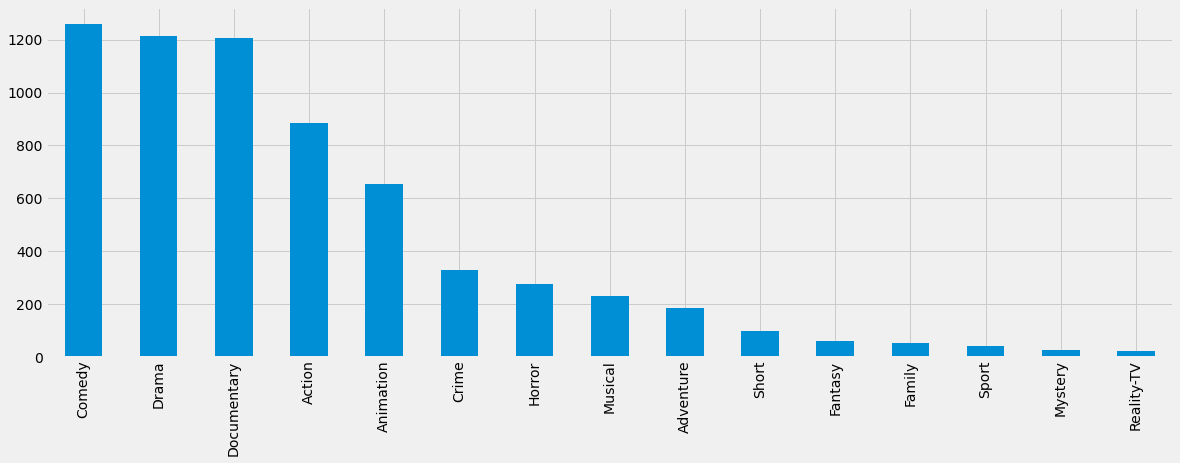

In [51]:
plt.figure(figsize = (18,6))

titulos_por_genero.plot(kind = 'bar')

plt.show()

In [52]:
accion = df[df['genero'] == 'Action']

x_accion_serie = accion.año.value_counts().sort_index(ascending = True)

x_accion_serie

1914     1
1926     1
1928     1
1931     1
1936     1
        ..
2017     8
2018     3
2019     3
2020    14
2021    14
Name: año, Length: 79, dtype: int64

In [53]:
docs = df[df['genero'] == 'Documentary']

x_docs_serie = docs.año.value_counts().sort_index(ascending = True)

x_docs_serie

1925    1
1927    3
1928    1
1933    2
1934    1
       ..
2017    9
2018    2
2019    8
2020    6
2021    2
Name: año, Length: 80, dtype: int64

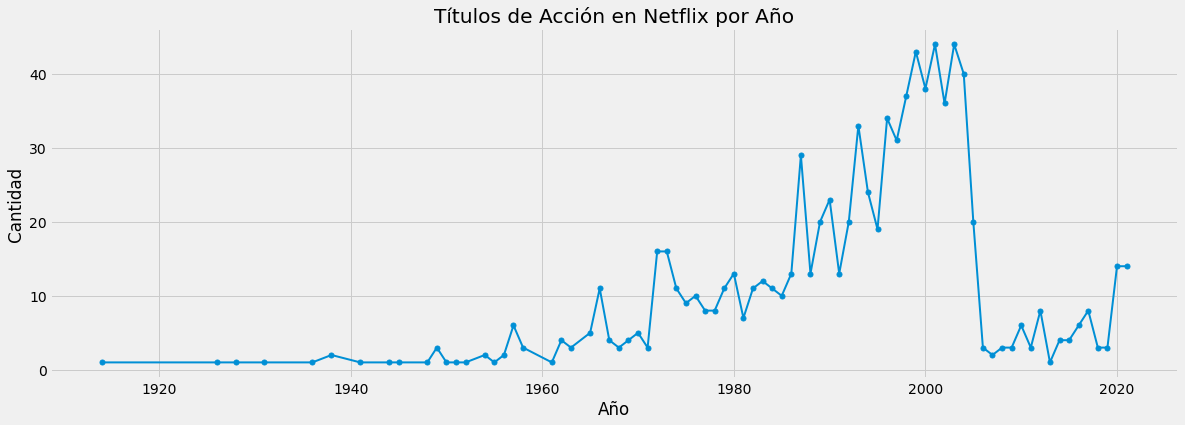

In [54]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

ax.plot(x_accion_serie, marker = 'o', markersize = 5, linewidth = 2)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Títulos de Acción en Netflix por Año')

plt.show()

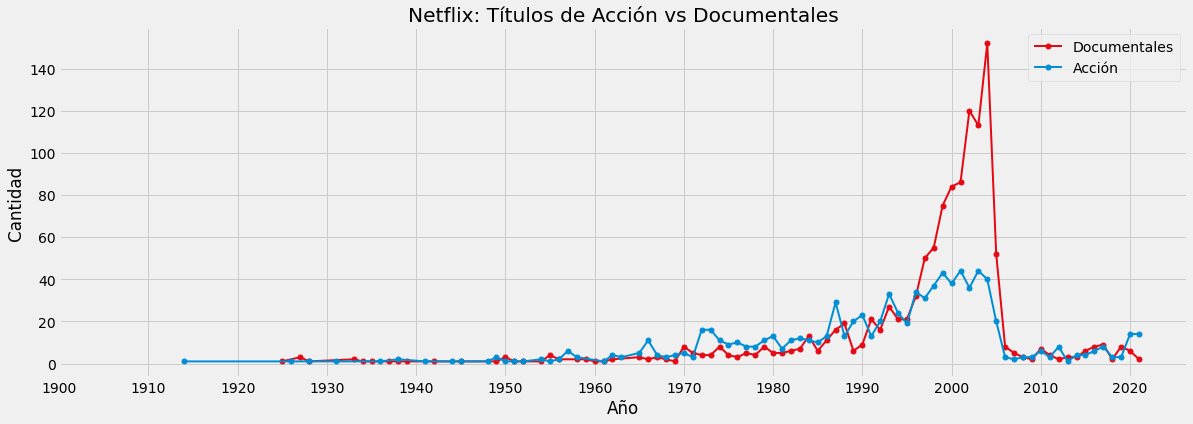

In [55]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

ax.plot(x_docs_serie, marker = 'o', markersize = 5, linewidth = 2, color = '#E50914', label = 'Documentales')
ax.plot(x_accion_serie, marker = 'o', markersize = 5, linewidth = 2, label = 'Acción')

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()
ax.set_title('Netflix: Títulos de Acción vs Documentales')

xinterval = np.arange(1900, 2021, 10)
ax.set_xticks(xinterval)
plt.show()

# Observando en Profundidad

In [56]:
periodo = df[df['año'] >= 2010]

In [57]:
periodo_agrupado = periodo.rating.groupby(periodo['genero'])

In [58]:
x_barra = periodo_agrupado.mean().sort_values(ascending = False).index

x_barra

Index(['Musical', 'Short', 'Documentary', 'Animation', 'Crime', 'Sport',
       'Comedy', 'Reality-TV', 'Adventure', 'Action', 'Drama', 'Fantasy',
       'Family', 'Mystery', 'Horror'],
      dtype='object', name='genero')

In [59]:
y_barra = periodo_agrupado.mean().sort_values(ascending = False)

y_barra

genero
Musical        80.000000
Short          77.321429
Documentary    73.900000
Animation      72.538462
Crime          70.096774
Sport          70.000000
Comedy         67.250000
Reality-TV     64.571429
Adventure      64.125000
Action         64.108108
Drama          63.956044
Fantasy        55.000000
Family         50.666667
Mystery        49.000000
Horror         48.555556
Name: rating, dtype: float64

In [60]:
desviacion_std = periodo_agrupado.std()

desviacion_std

genero
Action         13.269150
Adventure      10.829028
Animation       8.912682
Comedy         12.110809
Crime          16.481009
Documentary    10.598529
Drama          12.564423
Family          5.859465
Fantasy        11.972190
Horror         13.305179
Musical        12.825755
Mystery        21.213203
Reality-TV      8.885515
Short          13.765371
Sport           5.228129
Name: rating, dtype: float64

In [61]:
error = pd.concat([y_barra, desviacion_std], keys = ['rating', 'dv_std'], axis = 1)

error

,rating,dv_std
Musical,80.000000,12.825755
Short,77.321429,13.765371
Documentary,73.900000,10.598529
Animation,72.538462,8.912682
Crime,70.096774,16.481009
Sport,70.000000,5.228129
Comedy,67.250000,12.110809
Reality-TV,64.571429,8.885515
Adventure,64.125000,10.829028
Action,64.108108,13.269150


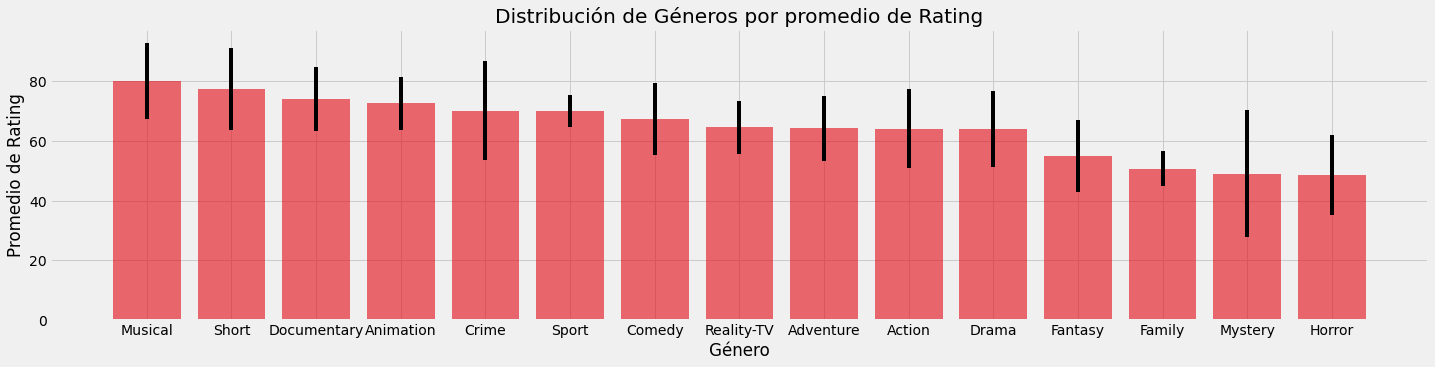

In [62]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(22,5)

ax.bar(x_barra, y_barra, yerr = error['dv_std'], color = '#E50914', alpha = 0.6)

ax.set_title('Distribución de Géneros por promedio de Rating')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Rating')

plt.show()

In [63]:
periodo_accion = periodo[periodo['genero'] == 'Action']
periodo_docs = periodo[periodo['genero'] == 'Documentary']

periodo_accion_rating = periodo_accion.rating

periodo_docs_rating = periodo_docs.rating

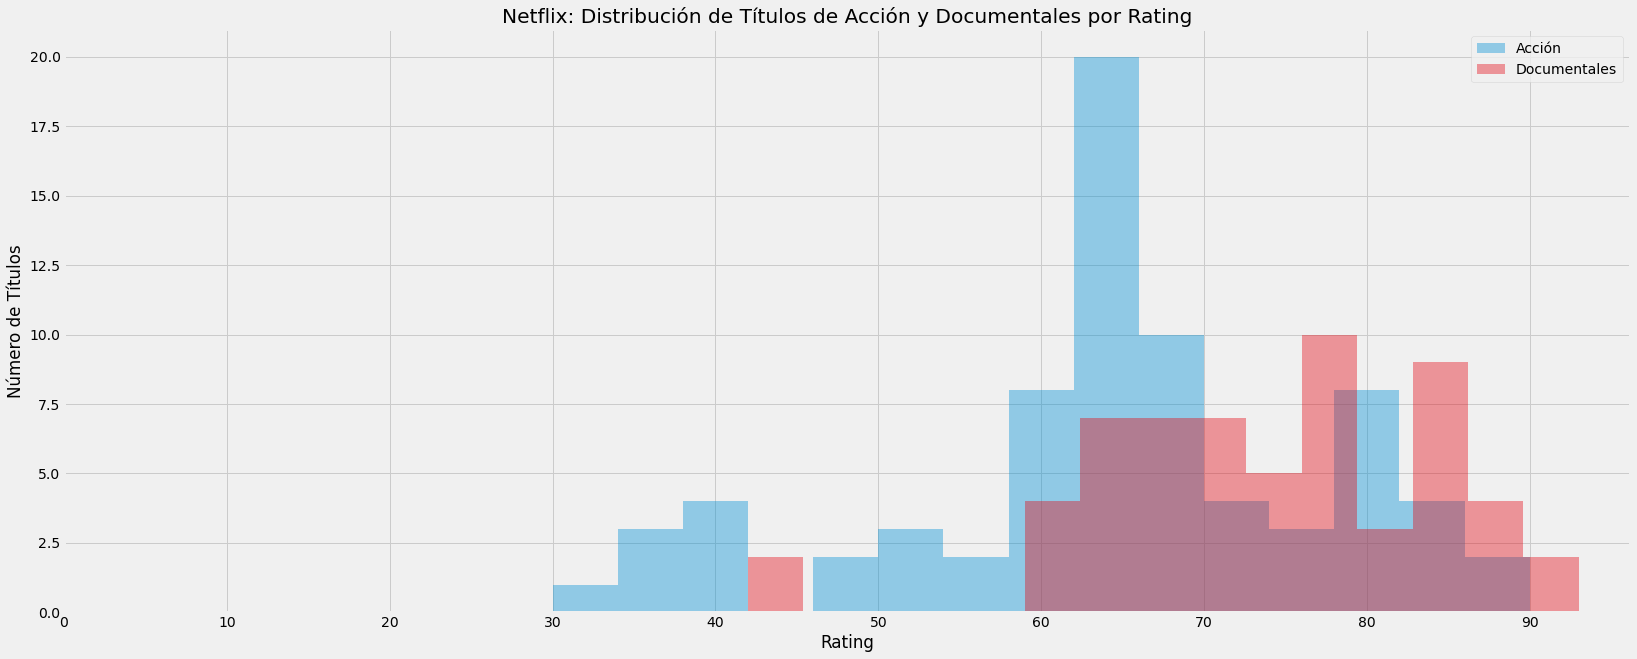

In [64]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(25,10)

color = '#E50914'
ax.hist(periodo_accion_rating, alpha = 0.4, bins = 15,label = 'Acción')
ax.hist(periodo_docs_rating, alpha = 0.4, bins = 15,label = 'Documentales', color = color)

xinterval = np.arange(0,100,10)
ax.set_xticks(xinterval)

ax.set_title('Netflix: Distribución de Títulos de Acción y Documentales por Rating')
ax.legend()
ax.set_xlabel('Rating')
ax.set_ylabel('Número de Títulos')

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


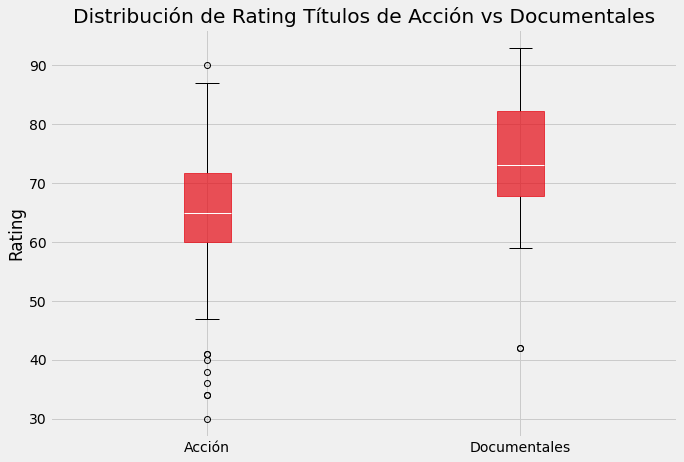

In [65]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
fig.set_size_inches(10,7)

ax.boxplot([periodo_accion_rating, periodo_docs_rating], patch_artist= True, boxprops= dict(facecolor = color, color = color, alpha = 0.7), medianprops = dict(color = 'white'))

ax.set_xticklabels(['Acción', 'Documentales'])
ax.set_ylabel('Rating')
ax.set_title('Distribución de Rating Títulos de Acción vs Documentales')

plt.show()

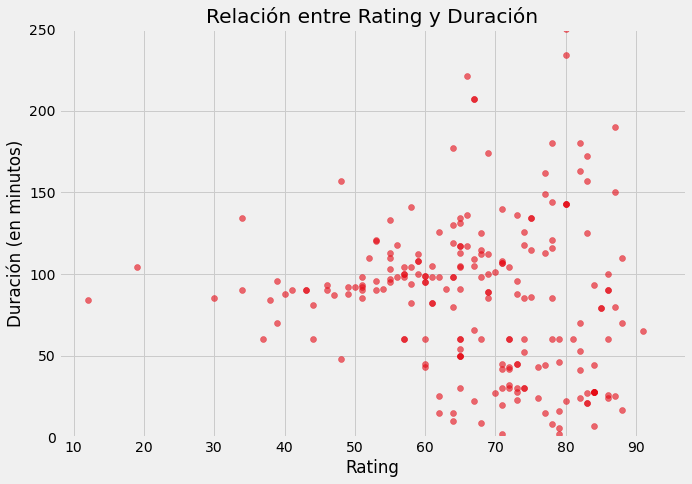

In [66]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.scatter(periodo.rating, periodo.duracion_minutos, color = color, alpha = 0.6)
ax.set_xlabel('Rating')
ax.set_ylabel('Duración (en minutos)')
ax.set_title('Relación entre Rating y Duración')
ax.set_ylim(0,250)
plt.show()

#Automatizar y Compartir tus Visualizaciones

In [67]:
periodo_col_gen = periodo['genero'].sort_values()

periodo_unicos = periodo_col_gen.unique()

periodo_unicos

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Reality-TV', 'Short', 'Sport'], dtype=object)

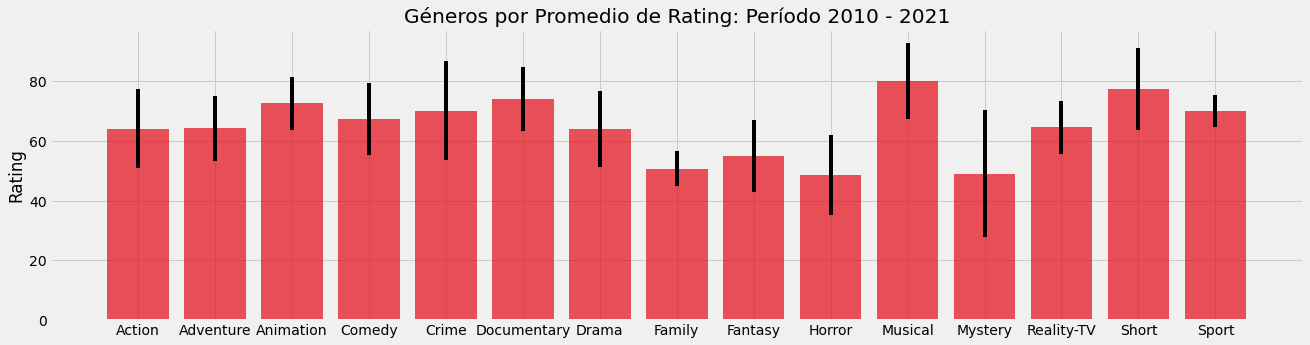

In [68]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

for gen in periodo_unicos:
  data_periodo = periodo[periodo['genero'] == gen]
  ax.bar(gen, data_periodo['rating'].mean(), yerr = data_periodo['rating'].std(), color = color, alpha = 0.7)

ax.set_ylabel('Rating')
ax.set_xticklabels(periodo_unicos, rotation = 0)
ax.set_title('Géneros por Promedio de Rating: Período 2010 - 2021')

plt.show()

fig.savefig('Géneros por Promedio de Rating 2010 - 2021.jpeg', dpi = 300)